In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# File to Load (Remember to Change These)
crime_2018 = "Resources/2018-19-data_sa_crime.csv"
crime_2019 = "Resources/2019-20-fullyr-data_sa_crime (1).csv"
crime_2020 = "Resources/2020-21_crime_qtr1_and_qtr2 (1).csv"
sa_postcodes = "Resources/australian_postcodes (1).csv"

# Read data files and store into DataFrames
crime_2018_df = pd.read_csv(crime_2018, parse_dates = ['Reported Date'])
crime_2019_df = pd.read_csv(crime_2019, parse_dates = ['Reported Date'])
crime_2020_df = pd.read_csv(crime_2020, parse_dates = ['Reported Date'])
sa_postcodes_df = pd.read_csv(sa_postcodes)

In [2]:
#merging 4 crime datasets into a merged_data dataframe
merged_data = pd.concat([crime_2018_df,crime_2019_df,crime_2020_df], ignore_index=True)

In [3]:
#cleaning merged_data dataframe and removing rows containing null values
clean_crime_data = merged_data.dropna(how='any')

In [4]:
#renaming SA postcode set to allow merge on shared column
sa_postcodes_df = sa_postcodes_df.rename(columns = {"postcode":"Postcode - Incident",
                                                   'locality': "Suburb - Incident"})

In [5]:
#using loc function to remove any crimes listed against postcode "NOT DISCLOSED"
clean_crime_data = clean_crime_data.loc[clean_crime_data["Postcode - Incident"]!= "NOT DISCLOSED"].copy()

In [6]:
#changing datatype from object to integer to allow merge of two datasets
clean_crime_data["Postcode - Incident"] = clean_crime_data["Postcode - Incident"].astype(str).astype(int)

In [7]:
#Check datatypes of clean_crime_data
#clean_crime_data.dtypes

In [8]:
#Check datatypes of sa_postcodes_df
#sa_postcodes_df.dtypes

In [9]:
#merge both datasets - using left join to drop any postcode data not associated with crimes in SA
crime_postcode_merge_df = pd.merge(clean_crime_data, sa_postcodes_df, on = ["Postcode - Incident", "Suburb - Incident"], how = "left")

In [10]:
#review updated dataframe
crime_postcode_merge_df.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,id,state,long,...,SA2_MAINCODE_2016,SA2_NAME_2016,SA3_CODE_2016,SA3_NAME_2016,SA4_CODE_2016,SA4_NAME_2016,RA_2011,RA_2016,MMM_2015,MMM_2019
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,15577.0,SA,138.603897,...,403041071.0,Aberfoyle Park,40304.0,Onkaparinga,403.0,Adelaide - South,1.0,1.0,1.0,1.0
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,5.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Receive or handle proceeds of crime,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1.0,13683.0,SA,138.608637,...,401011001.0,Adelaide,40101.0,Adelaide City,401.0,Adelaide - Central and Hills,1.0,1.0,1.0,1.0


In [11]:
crime_postcode_merge_df = crime_postcode_merge_df.drop(columns=['SA2_MAINCODE_2016', 'type', 'sa3', 'SA3_CODE_2016', 
                                      'SA1_MAINCODE_2011', 'id', 'SA1_MAINCODE_2016',
                                      'SA4_CODE_2016','RA_2011','RA_2016','MMM_2015','MMM_2019',
                                      'status','sa4','state'])

In [12]:
#Create 2019 and 2020 crime dataframe

crime_data_2019_2020 = crime_postcode_merge_df[["Reported Date", "Suburb - Incident", "Postcode - Incident", "Offence Level 1 Description",
                                               "Offence count", "long", "lat", "dc", "sa3name"]].copy()

crime_data_2019_2020.head()


,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name
0,2018-01-07,ABERFOYLE PARK,5159,OFFENCES AGAINST PROPERTY,1.0,138.603897,-35.061705,SOMERTON PARK DC,Onkaparinga
1,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
2,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,5.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
3,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City
4,2018-01-07,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City


In [13]:
# Extract and create month and year column
crime_data_2019_2020['Year'] = pd.DatetimeIndex(crime_data_2019_2020['Reported Date']).year
crime_data_2019_2020['Month'] = pd.DatetimeIndex(crime_data_2019_2020['Reported Date']).month
crime_data_2019_2020['Day'] = pd.DatetimeIndex(crime_data_2019_2020['Reported Date']).day


#Drop 2018 data 
crime_data_2019_2020 = crime_data_2019_2020[crime_data_2019_2020.Year != 2018]

crime_data_2019_2020.head()


,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month,Day
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,4.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1


In [14]:
#Create 2019 crime dataframe

crime_data_2019_df = crime_data_2019_2020[crime_data_2019_2020.Year != 2020]

crime_data_2019_df.head()


,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month,Day
46661,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46662,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,2.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46663,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,4.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46664,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1
46665,2019-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2019,1,1


In [15]:
#Create 2020 crime dataframe

crime_data_2020_df = crime_data_2019_2020[crime_data_2019_2020.Year != 2019]

crime_data_2020_df.head()


,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence count,long,lat,dc,sa3name,Year,Month,Day
143821,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,6.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1,1
143822,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1,1
143823,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,6.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1,1
143824,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1,1
143825,2020-01-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,1.0,138.608637,-34.937459,ADELAIDE CITY DELVRY C & BOXES,Adelaide City,2020,1,1


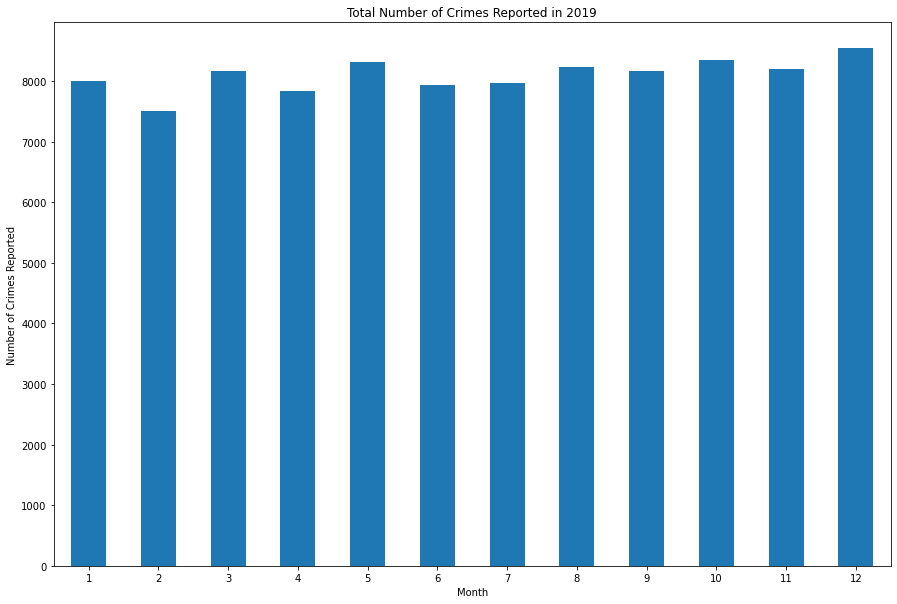

In [16]:
# Create bar graph for total crimes in 2019

crime_2019 = crime_data_2019_df.groupby("Month")['Offence Level 1 Description'].count()

crime_2019.plot(kind="bar", title="Total Number of Crimes Reported in 2019", figsize = (15,10))
plt.ylabel("Number of Crimes Reported")
plt.xticks(rotation=360)
plt.show()


In [17]:
# Print to see total crime in 2019

crime_2019_df = pd.DataFrame ({"Total Number of Crime 2019": crime_2019})

crime_2019_df

,Total Number of Crime 2019
Month,
1,8002
2,7505
3,8156
4,7836
5,8306
6,7925
7,7962
8,8223
9,8162


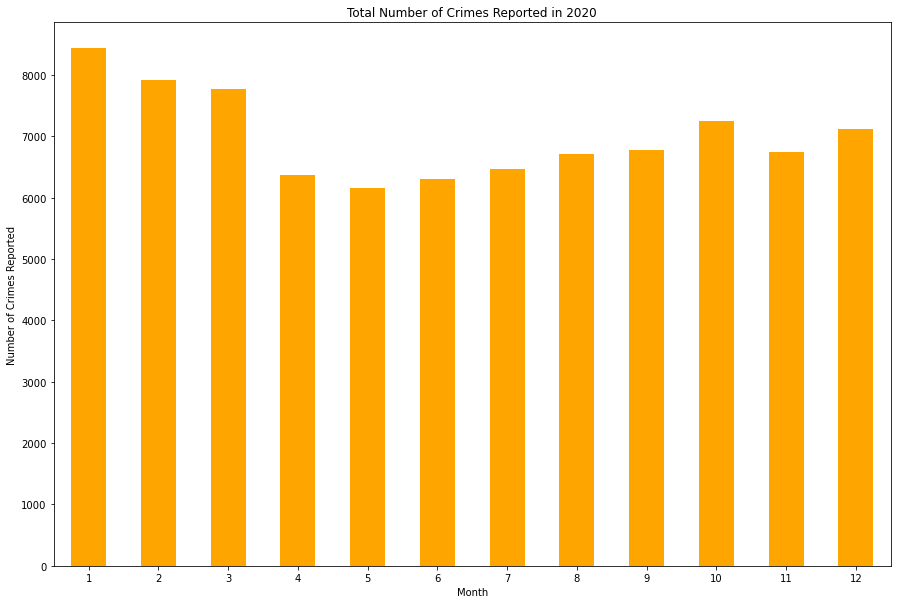

In [18]:
# Create bar graph for total crimes in 2020

crime_2020 = crime_data_2020_df.groupby("Month")['Offence Level 1 Description'].count()

crime_2020.plot(kind="bar", title="Total Number of Crimes Reported in 2020", color="orange", figsize = (15,10))
plt.ylabel("Number of Crimes Reported")
plt.xticks(rotation=360)
plt.show()

In [19]:
# Print to see total crime in 2020

crime_2020_df = pd.DataFrame ({"Total Number of Crime 2020": crime_2020})

crime_2020_df

,Total Number of Crime 2020
Month,
1,8437
2,7919
3,7768
4,6365
5,6162
6,6307
7,6472
8,6709
9,6777


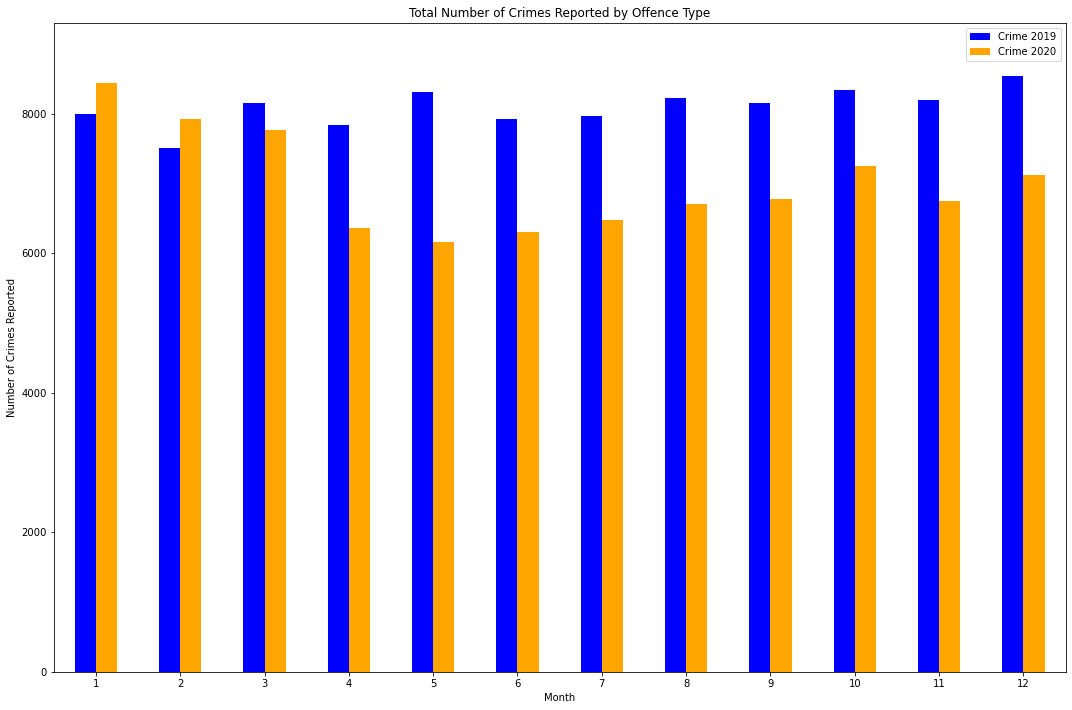

In [20]:
# Create combined bar graph for total crimes in 2019 & 2020

combined_crime = pd.DataFrame ({
    "Crime 2019" : crime_2019,
    "Crime 2020" : crime_2020
})

combined_crime.plot(kind="bar", color=["blue", "orange"], figsize = (15,10))
plt.title("Total Number of Crimes Reported by Offence Type")
plt.xlabel("Month")
plt.ylabel("Number of Crimes Reported")
plt.tight_layout()
plt.ylim(0, 9300)
plt.xticks(rotation=360)
plt.show()


In [21]:
#Print combined crime 2019 / 2020

combined_crime


,Crime 2019,Crime 2020
Month,,
1,8002,8437
2,7505,7919
3,8156,7768
4,7836,6365
5,8306,6162
6,7925,6307
7,7962,6472
8,8223,6709
9,8162,6777


# Crime breakdown by Offence Type of Property / Person 

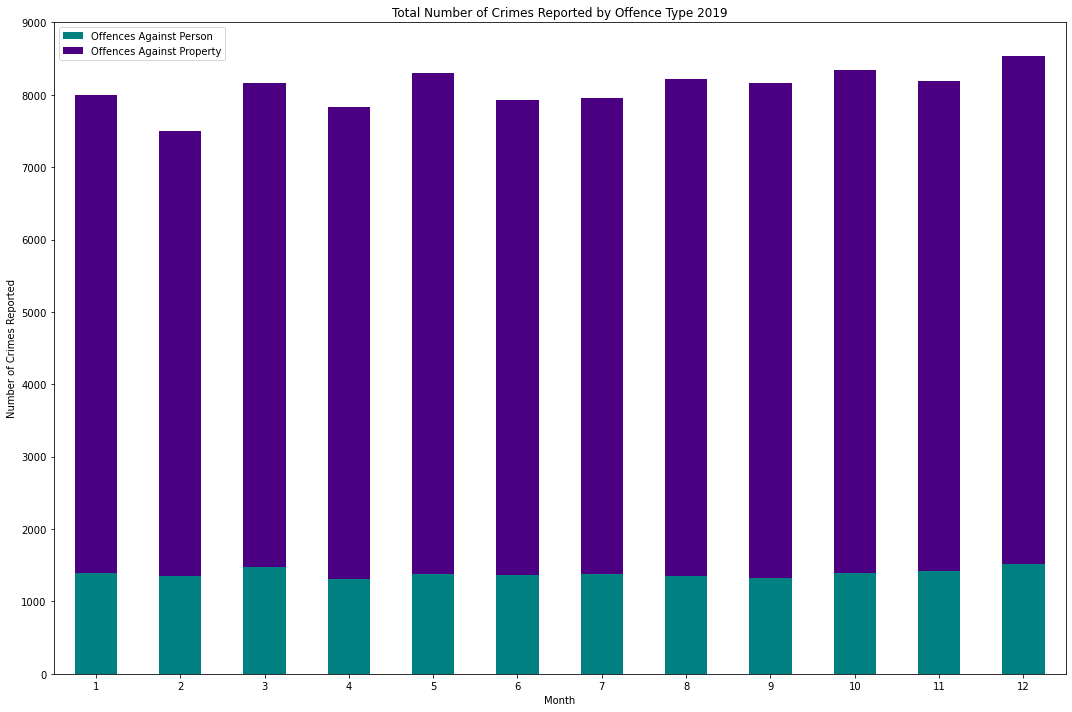

In [22]:
# Create stacked bar to compare offence type 2019
crime_2019_category = crime_data_2019_df.groupby("Month")['Offence Level 1 Description'].value_counts()

crime_2019_property = crime_2019_category.loc[1:12, 'OFFENCES AGAINST PROPERTY']
crime_2019_person = crime_2019_category.loc[1:12, 'OFFENCES AGAINST THE PERSON']

crime_cate_2019 = pd.merge(crime_2019_property, crime_2019_person, on="Month")
crime_cate_2019 = crime_cate_2019.rename(columns={"Offence Level 1 Description_x":"Offences Against Property",
                                                 "Offence Level 1 Description_y": "Offences Against Person"})

crime_cate_2019[["Offences Against Person", "Offences Against Property"]].plot(kind="bar", stacked=True, color=[ "teal", "indigo"], figsize = (15,10))
plt.xticks(rotation=360)
plt.title("Total Number of Crimes Reported by Offence Type 2019")
plt.xlabel("Month")
plt.ylabel("Number of Crimes Reported")
plt.ylim(0, 9000)
plt.tight_layout()
plt.show()

In [23]:
#Print total crime by category 2019 

crime_cate_2019


,Offences Against Property,Offences Against Person
Month,,
1,6613,1389
2,6153,1352
3,6675,1481
4,6525,1311
5,6925,1381
6,6563,1362
7,6584,1378
8,6868,1355
9,6843,1319


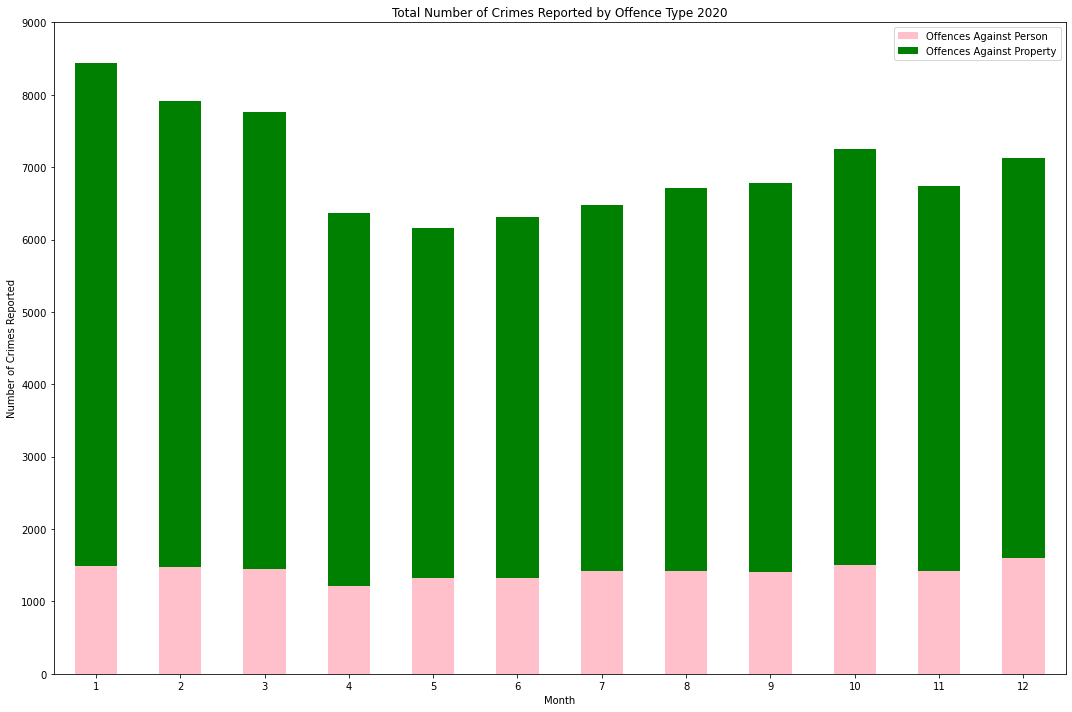

In [24]:
# Create stacked bar to compare offence type 2020
crime_2020_category = crime_data_2020_df.groupby("Month")['Offence Level 1 Description'].value_counts()

crime_2020_property = crime_2020_category.loc[1:12, 'OFFENCES AGAINST PROPERTY']
crime_2020_person = crime_2020_category.loc[1:12, 'OFFENCES AGAINST THE PERSON']

crime_cate_2020 = pd.merge(crime_2020_property, crime_2020_person, on="Month")
crime_cate_2020 = crime_cate_2020.rename(columns={"Offence Level 1 Description_x":"Offences Against Property",
                                                 "Offence Level 1 Description_y": "Offences Against Person"})

crime_cate_2020[["Offences Against Person", "Offences Against Property"]].plot(kind="bar", stacked=True, color=[ "pink", "green"], figsize = (15,10))
plt.xticks(rotation=360)
plt.title("Total Number of Crimes Reported by Offence Type 2020")
plt.xlabel("Month")
plt.ylabel("Number of Crimes Reported")
plt.ylim(0, 9000)
plt.tight_layout()
plt.show()


In [25]:
#Print total crime by category 2020

crime_cate_2020


,Offences Against Property,Offences Against Person
Month,,
1,6949,1488
2,6441,1478
3,6325,1443
4,5158,1207
5,4833,1329
6,4979,1328
7,5051,1421
8,5283,1426
9,5366,1411


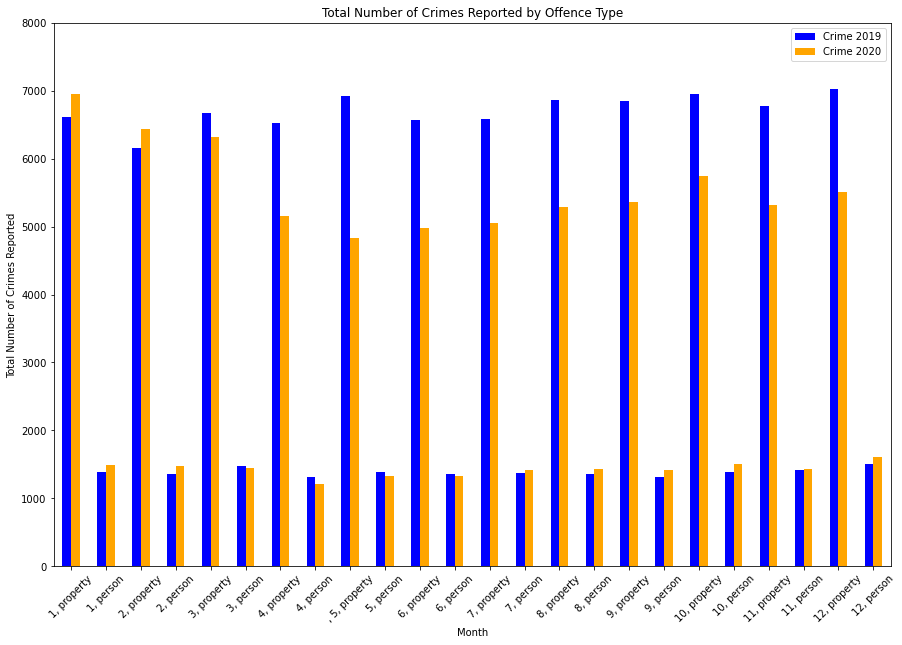

In [26]:
# Create combined bar graph for total crimes in 2019 by offence type

combined_crime_category = pd.DataFrame ({
    "Crime 2019" : crime_2019_category,
    "Crime 2020" : crime_2020_category
})

combined_crime_category.plot(kind="bar", color=["blue", "orange"], figsize = (15,10))
plt.title("Total Number of Crimes Reported by Offence Type")
plt.xlabel("Month")

tickvalues = range(0,24)
plt.xticks(ticks=tickvalues, labels=["1, property", "1, person", "2, property", "2, person", "3, property", "3, person", 
                                "4, property", "4, person", ", 5, property", "5, person", "6, property", "6, person", 
                                "7, property", "7, person", "8, property", "8, person", "9, property", "9, person", 
                                "10, property", "10, person", "11, property", "11, person", "12, property", "12, person"], 
                                rotation=45)

plt.ylabel("Total Number of Crimes Reported")
plt.ylim(0, 8000)
plt.show()

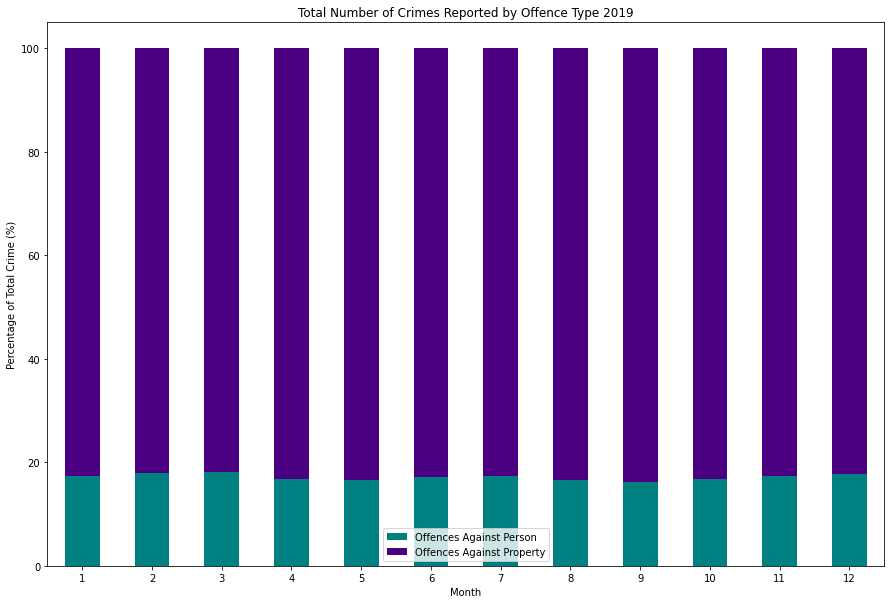

In [27]:
# Create stacked bar to compare offence type 2019 by total percentage

stacked_crime_2019 = crime_cate_2019.apply(lambda x: x*100/sum(x), axis=1)
stacked_crime_2019[["Offences Against Person", "Offences Against Property"]].plot(kind="bar", stacked=True, color=["teal", "indigo"], figsize=(15,10))
plt.xticks(rotation=360)
plt.title("Total Number of Crimes Reported by Offence Type 2019")
plt.xlabel("Month")
plt.ylabel("Percentage of Total Crime (%)")
plt.show()


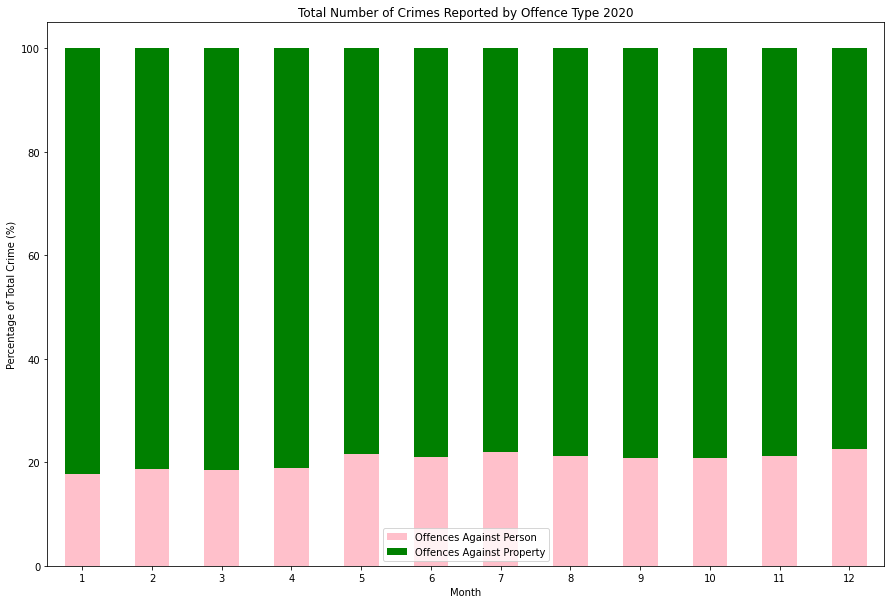

In [28]:
# Create stacked bar to compare offence type 2020 by total percentage

stacked_crime_2020 = crime_cate_2020.apply(lambda x: x*100/sum(x), axis=1)
stacked_crime_2020[["Offences Against Person", "Offences Against Property"]].plot(kind="bar", stacked=True, color=[ "pink", "green"], figsize=(15,10))
plt.xticks(rotation=360)
plt.title("Total Number of Crimes Reported by Offence Type 2020")
plt.xlabel("Month")
plt.ylabel("Percentage of Total Crime (%)")
plt.show()


In [29]:
#Print total crime by category 2019 / 2020

combined_crime_category


Crime 2019  Crime 2020
Month Offence Level 1 Description                        
1     OFFENCES AGAINST PROPERTY          6613        6949
      OFFENCES AGAINST THE PERSON        1389        1488
2     OFFENCES AGAINST PROPERTY          6153        6441
      OFFENCES AGAINST THE PERSON        1352        1478
3     OFFENCES AGAINST PROPERTY          6675        6325
      OFFENCES AGAINST THE PERSON        1481        1443
4     OFFENCES AGAINST PROPERTY          6525        5158
      OFFENCES AGAINST THE PERSON        1311        1207
5     OFFENCES AGAINST PROPERTY          6925        4833
      OFFENCES AGAINST THE PERSON        1381        1329
6     OFFENCES AGAINST PROPERTY          6563        4979
      OFFENCES AGAINST THE PERSON        1362        1328
7     OFFENCES AGAINST PROPERTY          6584        5051
      OFFENCES AGAINST THE PERSON        1378        1421
8     OFFENCES AGAINST PROPERTY          6868        5283
      OFFENCES AGAINST THE PERSON        1355        1426
9     OFFENCES AGAINST PROPERTY          6843        5366
      OFFENCES AGAINST THE PERSON        1319        1411
10    OFFENCES AGAINST PROPERTY          6950        5741
      OFFENCES AGAINST THE PERSON        1394        1505
11    OFFENCES AGAINST PROPERTY          6773        5317
      OFFENCES AGAINST THE PERSON        1424        1426
12    OFFENCES AGAINST PROPERTY          7029        5515
      OFFENCES AGAINST THE PERSON        1513        1606

# Crime Breakdown by Lockdown Period

In [30]:
# Create dataframe isolating lockdown dates 14 - 25 November

lockdown_2019_df = crime_data_2019_df.loc[(crime_data_2019_df["Reported Date"] >= "2019-11-14") & (crime_data_2019_df["Reported Date"] <= "2019-11-25")]
lockdown_2020_df = crime_data_2020_df.loc[(crime_data_2020_df["Reported Date"] >= "2020-11-14") & (crime_data_2020_df["Reported Date"] <= "2020-11-25")]

lockdown_2019_sum = lockdown_2019_df.groupby("Day")["Offence count"].sum()
lockdown_2020_sum = lockdown_2020_df.groupby("Day")["Offence count"].sum()

In [31]:
#Print total crime per day in november 2019

lockdown_2019_sum_df = pd.DataFrame ({"Total Number of Crime 2019": lockdown_2019_sum})

lockdown_2019_sum_df


,Total Number of Crime 2019
Day,
14,327.0
15,329.0
16,281.0
17,334.0
18,369.0
19,334.0
20,331.0
21,360.0
22,385.0


In [32]:
#Print total crime per day in november 2020

lockdown_2020_sum_df = pd.DataFrame ({"Total Number of Crime 2020": lockdown_2020_sum})

lockdown_2020_sum_df


,Total Number of Crime 2020
Day,
14,244.0
15,276.0
16,283.0
17,254.0
18,274.0
19,188.0
20,178.0
21,175.0
22,199.0


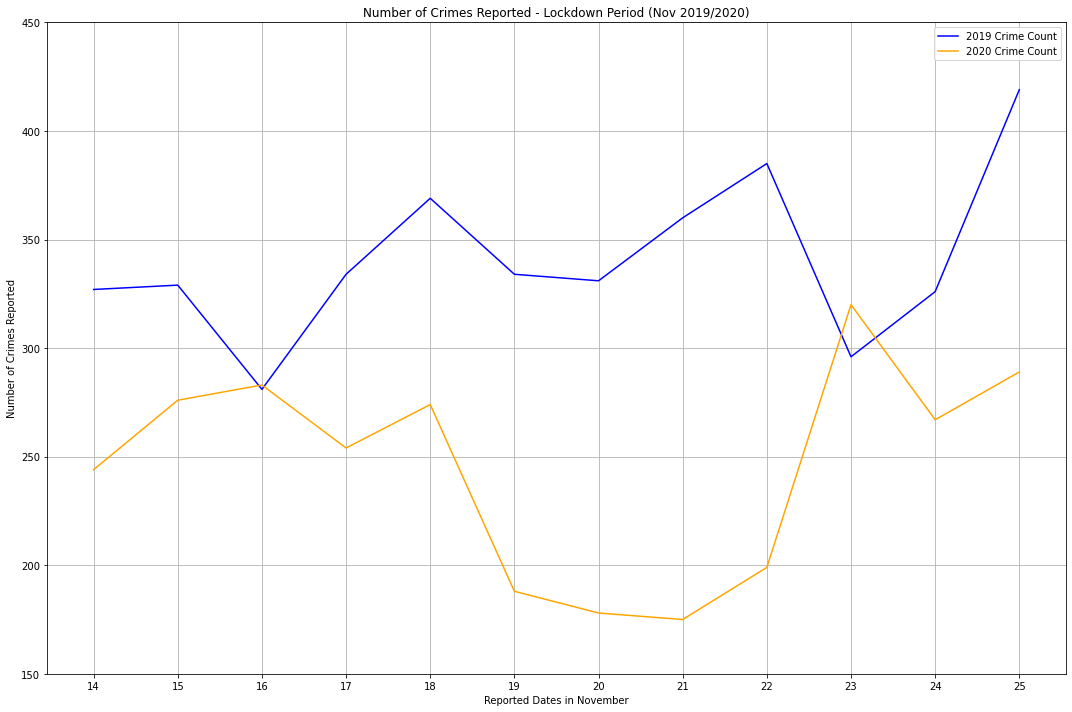

In [33]:
# Create linegraph to compare total crimes over lockdown 2019 / 2020

lockdown_2019_sum.plot(x="Day", y = "Offence Count", color="blue", label ="2019 Crime Count", figsize = (15,10))
lockdown_2020_sum.plot(x="Day", y = "Offence Count", color="orange", label = "2020 Crime Count", figsize = (15,10))

plt.xticks(np.arange(14, 26, 1))

plt.title("Number of Crimes Reported - Lockdown Period (Nov 2019/2020)")
plt.ylabel("Number of Crimes Reported")
plt.xlabel("Reported Dates in November")
plt.grid(True)
plt.ylim(150, 450)
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
# Create dataframe showing crime by offence type per day 2019

lockdown_2019_sum_date = lockdown_2019_df.groupby(["Day", "Offence Level 1 Description"])["Offence count"].sum()

lockdown_2019_property = lockdown_2019_sum_date.loc[14:25, 'OFFENCES AGAINST PROPERTY']
lockdown_2019_person = lockdown_2019_sum_date.loc[14:25, 'OFFENCES AGAINST THE PERSON']

lockdown_cate_2019 = pd.merge(lockdown_2019_property, lockdown_2019_person, on="Day")
lockdown_cate_2019 = lockdown_cate_2019.rename(columns={"Offence count_x":"Offences Against Property",
                                                 "Offence count_y": "Offences Against Person"})

lockdown_cate_2019


,Offences Against Property,Offences Against Person
Day,,
14,280.0,47.0
15,278.0,51.0
16,219.0,62.0
17,284.0,50.0
18,320.0,49.0
19,269.0,65.0
20,273.0,58.0
21,316.0,44.0
22,307.0,78.0


In [35]:
# Create dataframe showing crime by offence type per day 2019

lockdown_2020_sum_date = lockdown_2020_df.groupby(["Day", "Offence Level 1 Description"])["Offence count"].sum()

lockdown_2020_property = lockdown_2020_sum_date.loc[14:25, 'OFFENCES AGAINST PROPERTY']
lockdown_2020_person = lockdown_2020_sum_date.loc[14:25, 'OFFENCES AGAINST THE PERSON']

lockdown_cate_2020 = pd.merge(lockdown_2020_property, lockdown_2020_person, on="Day")
lockdown_cate_2020 = lockdown_cate_2020.rename(columns={"Offence count_x":"Offences Against Property",
                                                 "Offence count_y": "Offences Against Person"})

lockdown_cate_2020


,Offences Against Property,Offences Against Person
Day,,
14,183.0,61.0
15,202.0,74.0
16,229.0,54.0
17,210.0,44.0
18,207.0,67.0
19,145.0,43.0
20,132.0,46.0
21,135.0,40.0
22,153.0,46.0


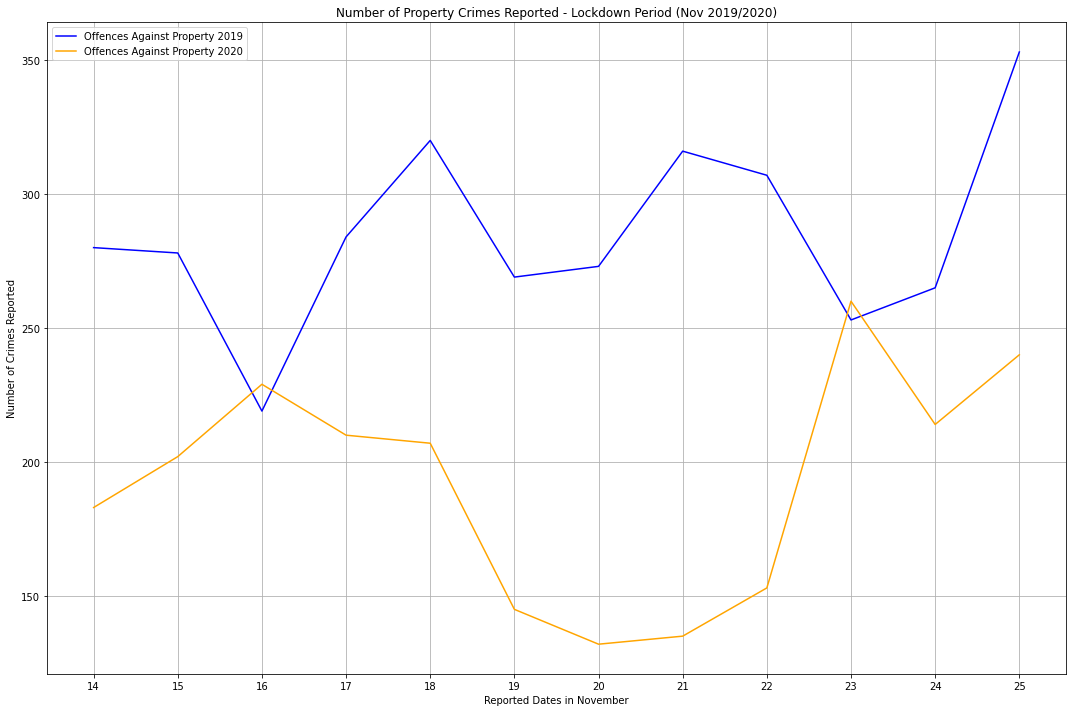

In [36]:
# Create linegraph to compare property crimes over lockdown 2019 / 2020

lockdown_2019_2020_property = pd.DataFrame ({
    "Offences Against Property 2019": lockdown_2019_property,
    "Offences Against Property 2020": lockdown_2020_property
})

lockdown_2019_2020_property.plot(kind="line", color=["blue", "orange"], figsize = (15,10))

# plt.xticks(np.arange(14, 26, 1))

plt.title("Number of Property Crimes Reported - Lockdown Period (Nov 2019/2020)")
plt.ylabel("Number of Crimes Reported")
plt.xlabel("Reported Dates in November")

tickvalues = range(0,12)
plt.xticks(ticks=tickvalues, labels=["14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"], rotation=360)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
# Print data property crime during lockdown 2019 / 2020

lockdown_2019_2020_property["Offences Count"] = lockdown_2019_2020_property["Offences Against Property 2019"] - lockdown_2019_2020_property["Offences Against Property 2020"]
lockdown_2019_2020_property["Percentage Change"] = lockdown_2019_2020_property["Offences Against Property 2020"] / lockdown_2019_2020_property["Offences Against Property 2019"]

lockdown_2019_2020_property["Percentage Change"] = lockdown_2019_2020_property["Percentage Change"].map("{:.2%}".format)

lockdown_2019_2020_property


,,Offences Against Property 2019,Offences Against Property 2020,Offences Count,Percentage Change
Day,Offence Level 1 Description,,,,
14,OFFENCES AGAINST PROPERTY,280.0,183.0,97.0,65.36%
15,OFFENCES AGAINST PROPERTY,278.0,202.0,76.0,72.66%
16,OFFENCES AGAINST PROPERTY,219.0,229.0,-10.0,104.57%
17,OFFENCES AGAINST PROPERTY,284.0,210.0,74.0,73.94%
18,OFFENCES AGAINST PROPERTY,320.0,207.0,113.0,64.69%
19,OFFENCES AGAINST PROPERTY,269.0,145.0,124.0,53.90%
20,OFFENCES AGAINST PROPERTY,273.0,132.0,141.0,48.35%
21,OFFENCES AGAINST PROPERTY,316.0,135.0,181.0,42.72%
22,OFFENCES AGAINST PROPERTY,307.0,153.0,154.0,49.84%


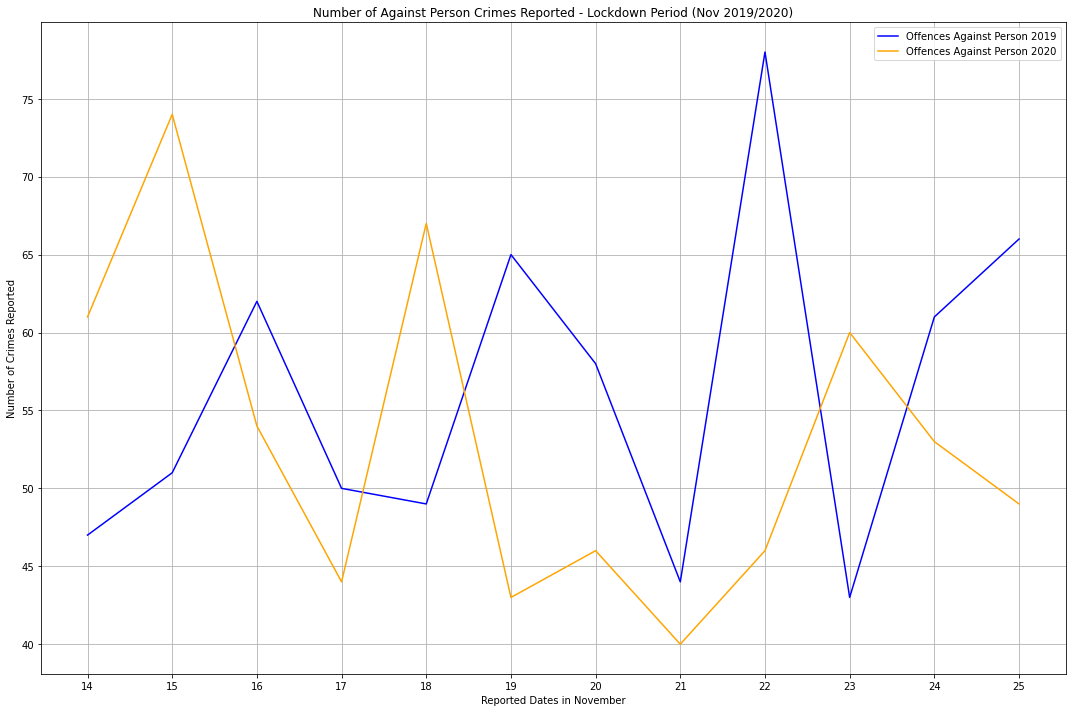

In [38]:
# Create linegraph to compare against person crimes over lockdown 2019 / 2020

lockdown_2019_2020_person = pd.DataFrame ({
    "Offences Against Person 2019": lockdown_2019_person,
    "Offences Against Person 2020": lockdown_2020_person
})

lockdown_2019_2020_person.plot(kind="line", color=["blue", "orange"], figsize = (15,10))

plt.title("Number of Against Person Crimes Reported - Lockdown Period (Nov 2019/2020)")
plt.ylabel("Number of Crimes Reported")
plt.xlabel("Reported Dates in November")

tickvalues = range(0,12)
plt.xticks(ticks=tickvalues, labels=["14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"], rotation=360)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
# Print data against person crime during lockdown 2019 / 2020

lockdown_2019_2020_person["Offences Count"] = lockdown_2019_2020_person["Offences Against Person 2019"] - lockdown_2019_2020_person["Offences Against Person 2020"]
lockdown_2019_2020_person["Percentage Change"] = lockdown_2019_2020_person["Offences Against Person 2020"] / lockdown_2019_2020_person["Offences Against Person 2019"]

lockdown_2019_2020_person["Percentage Change"] = lockdown_2019_2020_person["Percentage Change"].map("{:.2%}".format)

lockdown_2019_2020_person


,,Offences Against Person 2019,Offences Against Person 2020,Offences Count,Percentage Change
Day,Offence Level 1 Description,,,,
14,OFFENCES AGAINST THE PERSON,47.0,61.0,-14.0,129.79%
15,OFFENCES AGAINST THE PERSON,51.0,74.0,-23.0,145.10%
16,OFFENCES AGAINST THE PERSON,62.0,54.0,8.0,87.10%
17,OFFENCES AGAINST THE PERSON,50.0,44.0,6.0,88.00%
18,OFFENCES AGAINST THE PERSON,49.0,67.0,-18.0,136.73%
19,OFFENCES AGAINST THE PERSON,65.0,43.0,22.0,66.15%
20,OFFENCES AGAINST THE PERSON,58.0,46.0,12.0,79.31%
21,OFFENCES AGAINST THE PERSON,44.0,40.0,4.0,90.91%
22,OFFENCES AGAINST THE PERSON,78.0,46.0,32.0,58.97%


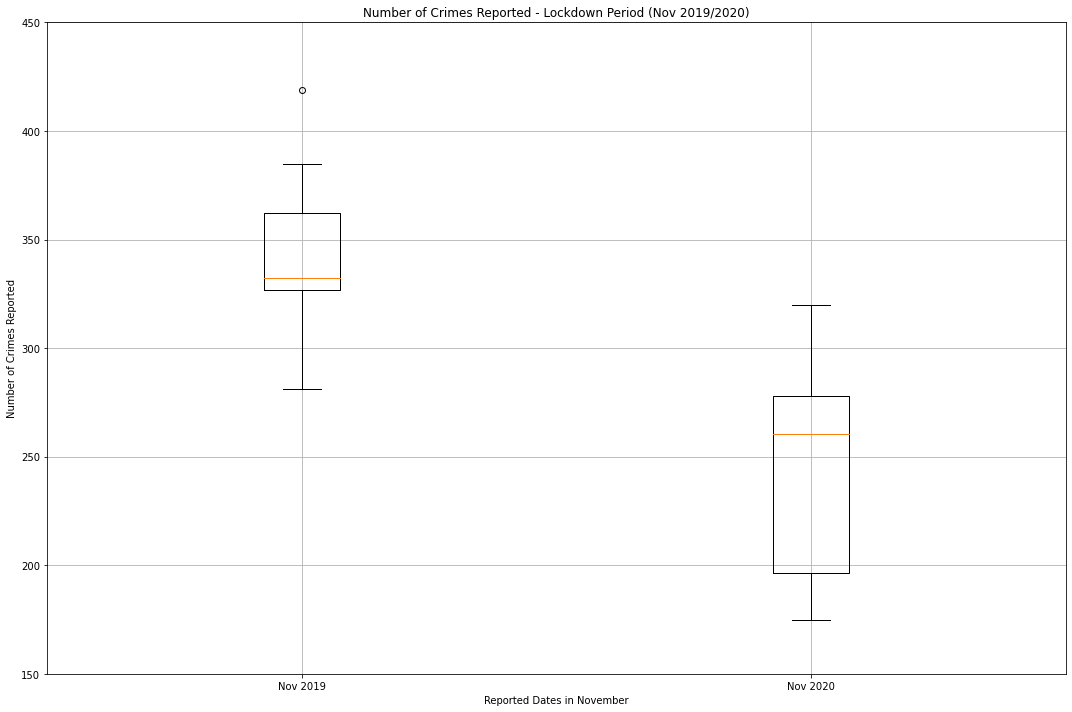

In [40]:
# Create boxplot to compare the total crimes over lockdown period 2019/2020

lockdown_crime_boxplot = [lockdown_2019_sum, lockdown_2020_sum]

fig, ax1 = plt.subplots(figsize = (15,10))
ax1.set_title("Number of Crimes Reported - Lockdown Period (Nov 2019/2020)")
ax1.set_xlabel("Reported Dates in November")
ax1.set_ylabel("Number of Crimes Reported")
ax1.boxplot(lockdown_crime_boxplot, labels=["Nov 2019", "Nov 2020"])
plt.ylim(150, 450)
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
# Calculate IQR for crimes during lockdown in 2019

quartiles = lockdown_2019_sum.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = lockdown_2019_sum.loc[(lockdown_2019_sum < lower_bound) | (lockdown_2019_sum > upper_bound)]


print(f"The lower quartile for crime during lockdown in 2019 is: {lowerq}")
print(f"The upper quartiles for crime during lockdown in 2019 is: {upperq}")
print(f"The interquartile for crime during lockdown in 2019 is: {iqr}")
print(f"Potential outliers for crime during lockdown in 2019: {outliers}")


The lower quartile for crime during lockdown in 2019 is: 326.75
The upper quartiles for crime during lockdown in 2019 is: 362.25
The interquartile for crime during lockdown in 2019 is: 35.5
Potential outliers for crime during lockdown in 2019: Day
25    419.0
Name: Offence count, dtype: float64


In [42]:
# Calculate IQR for crimes during lockdown in 2020

quartiles = lockdown_2020_sum.quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = lockdown_2020_sum.loc[(lockdown_2020_sum < lower_bound) | (lockdown_2020_sum > upper_bound)]

print(f"The lower quartile for crime during lockdown in 2020 is: {lowerq}")
print(f"The upper quartiles for crime during lockdown in 2020 is: {upperq}")
print(f"The interquartile for crime during lockdown in 2020 is: {iqr}")
print(f"Potential outliers for crime during lockdown in 2020: {outliers}")


The lower quartile for crime during lockdown in 2020 is: 196.25
The upper quartiles for crime during lockdown in 2020 is: 277.75
The interquartile for crime during lockdown in 2020 is: 81.5
Potential outliers for crime during lockdown in 2020: Series([], Name: Offence count, dtype: float64)


In [43]:
# Lockdown summary 

lockdown_summary = pd.DataFrame ({
"2019": lockdown_2019_sum,
"2020": lockdown_2020_sum })
    
lockdown_summary.describe()


,2019,2020
count,12.000000,12.000000
mean,340.916667,245.583333
std,37.601882,48.732029
min,281.000000,175.000000
25%,326.750000,196.250000
50%,332.500000,260.500000
75%,362.250000,277.750000
max,419.000000,320.000000


In [44]:
# Percentage change and differnce in numbers of total crimes over lockdown 2019 / 2020

pct_change = lockdown_2020_sum / lockdown_2019_sum
nmbr_crime = lockdown_2020_sum - lockdown_2019_sum
mean = lockdown_summary.mean()

lockdown_summary = pd.DataFrame ({
    "2019": lockdown_2019_sum,
    "2020": lockdown_2020_sum,
    "Difference No. Crimes": nmbr_crime,
    "Percentage Change": pct_change 
})

lockdown_summary["Percentage Change"] = lockdown_summary["Percentage Change"].map("{:.2%}".format)

lockdown_summary


,2019,2020,Difference No. Crimes,Percentage Change
Day,,,,
14,327.0,244.0,-83.0,74.62%
15,329.0,276.0,-53.0,83.89%
16,281.0,283.0,2.0,100.71%
17,334.0,254.0,-80.0,76.05%
18,369.0,274.0,-95.0,74.25%
19,334.0,188.0,-146.0,56.29%
20,331.0,178.0,-153.0,53.78%
21,360.0,175.0,-185.0,48.61%
22,385.0,199.0,-186.0,51.69%
